In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from scipy.stats import norm

plt.rcParams['text.usetex'] = True

In [10]:
path = './'
SAVE = False

In [11]:
N = 1000
n = 4
means = [-4,-2,0,3]
stds = [1, 0.5, 1.2, 1.6]
ps = np.asarray([0.8, 0.5, 1.5, 0.8])/n

set0 = [0,1,2,3]
set1 = [0,2]
set2 = [2,3]
sets = [set0,set1,set2]

x = np.linspace(-7, 7, N)
ys = np.asarray([p*norm.pdf(x, m, s) for (p,m,s) in zip(ps,means,stds)])
mix = np.sum(ys,0)
mix1 = np.sum(ys[set1,:],0)

mixs = [np.sum(ys[s,:],0) for s in sets]

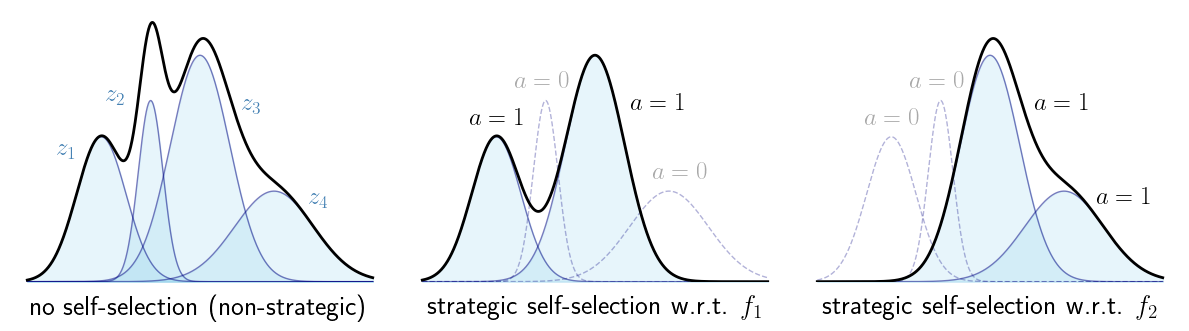

In [12]:
fig, axs = plt.subplots(1,3)
fig.set_size_inches(12, 3.4)

for j,s in enumerate(sets):
    for i in range(n):
        if i in s:
            axs[j].fill_between(x, ys[i],color='skyblue',alpha=0.2)
            axs[j].plot(x, ys[i], '-', color='navy', linewidth=1, alpha=0.5)
        else:
            axs[j].plot(x, ys[i], '--', color='navy', linewidth=1, alpha=0.3)
    axs[j].plot(x, mixs[j], 'k-', linewidth=2)

fsz = 18
axs[0].text(means[0]-1.8,np.max(ys[0,:]-0.01),r'$z_1$',color='steelblue', fontsize=fsz)
axs[0].text(means[1]-1.8,np.max(ys[1,:]),r'$z_2$',color='steelblue', fontsize=fsz)
axs[0].text(means[2]+1.7,np.max(ys[2,:]-0.03),r'$z_3$',color='steelblue', fontsize=fsz)
axs[0].text(means[3]+1.4,np.max(ys[3,:]-0.007),r'$z_4$',color='steelblue', fontsize=fsz)

axs[1].text(means[0]-1.1,np.max(ys[0,:]+0.007),r'$a=1$',color='k', fontsize=fsz)
axs[1].text(means[1]-1.3,np.max(ys[1,:]+0.007),r'$a=0$',color='darkgrey', fontsize=fsz)
axs[1].text(means[2]+1.4,np.max(ys[2,:]-0.03),r'$a=1$',color='k', fontsize=fsz)
axs[1].text(means[3]-0.7,np.max(ys[3,:]+0.007),r'$a=0$',color='darkgrey', fontsize=fsz)

axs[2].text(means[0]-1.1,np.max(ys[0,:]+0.007),r'$a=0$',color='darkgrey', fontsize=fsz)
axs[2].text(means[1]-1.3,np.max(ys[1,:]+0.007),r'$a=0$',color='darkgrey', fontsize=fsz)
axs[2].text(means[2]+1.8,np.max(ys[2,:]-0.03),r'$a=1$',color='k', fontsize=fsz)
axs[2].text(means[3]+1.3,np.max(ys[3,:]-0.007),r'$a=1$',color='k', fontsize=fsz)

# axs[0].text(x[0],np.max(ys),'non-strategic:', fontsize=fsz*1.2)
# axs[1].text(x[0],np.max(ys),r'$f_1:$', fontsize=fsz*1.2)
# axs[2].text(x[0],np.max(ys),r'$f_2:$', fontsize=fsz*1.2)
axs[0].set_title('no self-selection (non-strategic)', y=-0.15, fontsize=fsz*1.1)
axs[1].set_title(r'strategic self-selection w.r.t. $f_1$', y=-0.15, fontsize=fsz*1.1)
axs[2].set_title(r'strategic self-selection w.r.t. $f_2$', y=-0.15, fontsize=fsz*1.1)


for ax in axs:
    ax.set_ylim([0,np.max(mixs)*1.05])
    ax.axis('off')
#     ax.set_xticks([])
#     ax.set_yticks([])    
fig.tight_layout()

if SAVE:
    plt.savefig(path + '/dists.pdf', format='pdf')
    plt.savefig(path + '/dists.png', format='png')
else:
    plt.show()